In [1]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np

In [2]:
model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])


In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [4]:
TRAINING_DIR = "projectdata"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
VALIDATION_DIR = "projectdata"
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 339 images belonging to 2 classes.
Found 339 images belonging to 2 classes.


In [5]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')


In [6]:
history = model.fit(train_generator,
                              epochs=20,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

Epoch 1/20
34/34 [==============================] - ETA: 0s - loss: 0.7781 - acc: 0.5959

INFO:tensorflow:Assets written to: model2-001.model\assets


INFO:tensorflow:Assets written to: model2-001.model\assets


34/34 [==============================] - 128s 4s/step - loss: 0.7781 - acc: 0.5959 - val_loss: 0.6224 - val_acc: 0.6195
Epoch 2/20
34/34 [==============================] - ETA: 0s - loss: 0.6428 - acc: 0.6726

INFO:tensorflow:Assets written to: model2-002.model\assets


INFO:tensorflow:Assets written to: model2-002.model\assets


34/34 [==============================] - 121s 4s/step - loss: 0.6428 - acc: 0.6726 - val_loss: 0.5930 - val_acc: 0.7434
Epoch 3/20
34/34 [==============================] - ETA: 0s - loss: 0.5898 - acc: 0.7198

INFO:tensorflow:Assets written to: model2-003.model\assets


INFO:tensorflow:Assets written to: model2-003.model\assets


34/34 [==============================] - 135s 4s/step - loss: 0.5898 - acc: 0.7198 - val_loss: 0.5195 - val_acc: 0.6991
Epoch 4/20
34/34 [==============================] - ETA: 0s - loss: 0.6117 - acc: 0.6932

INFO:tensorflow:Assets written to: model2-004.model\assets


INFO:tensorflow:Assets written to: model2-004.model\assets


34/34 [==============================] - 128s 4s/step - loss: 0.6117 - acc: 0.6932 - val_loss: 0.4831 - val_acc: 0.7758
Epoch 5/20
34/34 [==============================] - ETA: 0s - loss: 0.5628 - acc: 0.6991

INFO:tensorflow:Assets written to: model2-005.model\assets


INFO:tensorflow:Assets written to: model2-005.model\assets


34/34 [==============================] - 126s 4s/step - loss: 0.5628 - acc: 0.6991 - val_loss: 0.4659 - val_acc: 0.7758
Epoch 6/20
34/34 [==============================] - 123s 4s/step - loss: 0.6041 - acc: 0.6932 - val_loss: 0.5235 - val_acc: 0.7168
Epoch 7/20
34/34 [==============================] - 119s 4s/step - loss: 0.5630 - acc: 0.7198 - val_loss: 0.6033 - val_acc: 0.6785
Epoch 8/20
34/34 [==============================] - 103s 3s/step - loss: 0.6268 - acc: 0.6460 - val_loss: 0.5455 - val_acc: 0.7316
Epoch 9/20
34/34 [==============================] - ETA: 0s - loss: 0.5622 - acc: 0.7198

INFO:tensorflow:Assets written to: model2-009.model\assets


INFO:tensorflow:Assets written to: model2-009.model\assets


34/34 [==============================] - 122s 4s/step - loss: 0.5622 - acc: 0.7198 - val_loss: 0.4196 - val_acc: 0.8171
Epoch 10/20
34/34 [==============================] - 113s 3s/step - loss: 0.5192 - acc: 0.7729 - val_loss: 0.4289 - val_acc: 0.8171
Epoch 11/20
34/34 [==============================] - 158s 5s/step - loss: 0.5213 - acc: 0.7788 - val_loss: 0.4226 - val_acc: 0.7906
Epoch 12/20
34/34 [==============================] - ETA: 0s - loss: 0.5371 - acc: 0.7375

INFO:tensorflow:Assets written to: model2-012.model\assets


INFO:tensorflow:Assets written to: model2-012.model\assets


34/34 [==============================] - 148s 4s/step - loss: 0.5371 - acc: 0.7375 - val_loss: 0.3998 - val_acc: 0.8260
Epoch 13/20
34/34 [==============================] - 138s 4s/step - loss: 0.4967 - acc: 0.7729 - val_loss: 0.4226 - val_acc: 0.8142
Epoch 14/20
34/34 [==============================] - 153s 5s/step - loss: 0.5576 - acc: 0.7493 - val_loss: 0.4781 - val_acc: 0.7552
Epoch 15/20
34/34 [==============================] - ETA: 0s - loss: 0.5118 - acc: 0.7640

INFO:tensorflow:Assets written to: model2-015.model\assets


INFO:tensorflow:Assets written to: model2-015.model\assets


34/34 [==============================] - 162s 5s/step - loss: 0.5118 - acc: 0.7640 - val_loss: 0.3676 - val_acc: 0.8378
Epoch 16/20
34/34 [==============================] - 144s 4s/step - loss: 0.5205 - acc: 0.7463 - val_loss: 0.4147 - val_acc: 0.8260
Epoch 17/20
34/34 [==============================] - ETA: 0s - loss: 0.4765 - acc: 0.7493

INFO:tensorflow:Assets written to: model2-017.model\assets


INFO:tensorflow:Assets written to: model2-017.model\assets


34/34 [==============================] - 143s 4s/step - loss: 0.4765 - acc: 0.7493 - val_loss: 0.3455 - val_acc: 0.8702
Epoch 18/20
34/34 [==============================] - 154s 5s/step - loss: 0.4363 - acc: 0.8083 - val_loss: 0.3766 - val_acc: 0.8378
Epoch 19/20
34/34 [==============================] - 150s 4s/step - loss: 0.4942 - acc: 0.7670 - val_loss: 0.3573 - val_acc: 0.8555
Epoch 20/20
34/34 [==============================] - ETA: 0s - loss: 0.4690 - acc: 0.7847

INFO:tensorflow:Assets written to: model2-020.model\assets


INFO:tensorflow:Assets written to: model2-020.model\assets


34/34 [==============================] - 158s 5s/step - loss: 0.4690 - acc: 0.7847 - val_loss: 0.3055 - val_acc: 0.8850


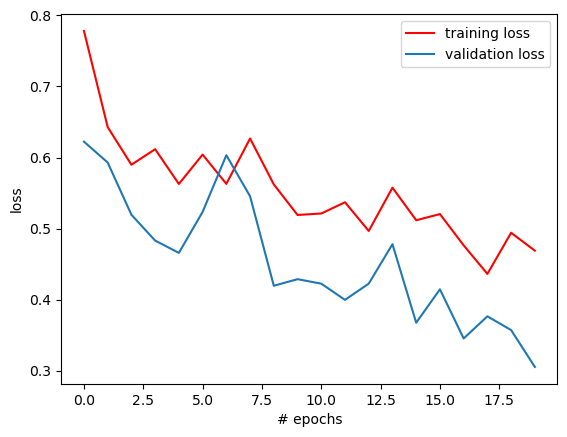

In [7]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()